In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Bhavani\OneDrive\Desktop\IRTP\CNN_project\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Load dataset

In [2]:
X_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

#data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)


In [4]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (2000, 100, 100, 3)
Training labels shape: (2000, 1)
Testing data shape: (400, 100, 100, 3)
Testing labels shape: (400, 1)


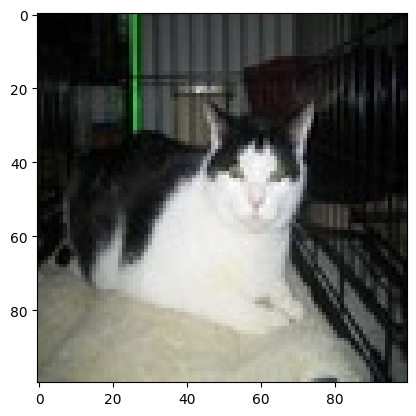

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


c:\Users\Bhavani\OneDrive\Desktop\IRTP\CNN_project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model = Sequential()

model.add(Conv2D (32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D (64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D (128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))



In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - accuracy: 0.7410 - loss: 0.5188 - val_accuracy: 0.7625 - val_loss: 0.4963
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 390ms/step - accuracy: 0.7545 - loss: 0.4998 - val_accuracy: 0.7575 - val_loss: 0.5052
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.7650 - loss: 0.4866 - val_accuracy: 0.7850 - val_loss: 0.4675
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 0.7470 - loss: 0.5013 - val_accuracy: 0.7900 - val_loss: 0.4756
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7680 - loss: 0.4892 - val_accuracy: 0.7800 - val_loss: 0.4714
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.7690 - loss: 0.4815 - val_accuracy: 0.7750 - val_loss: 0.4617
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.7845 - loss: 0.4669 - val_accuracy: 0.7775 - val_loss: 0.4726
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.7625 - loss: 0.4934 - val_accu

In [10]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7475 - loss: 0.5336


[0.5336048007011414, 0.7475000023841858]

# making predictions

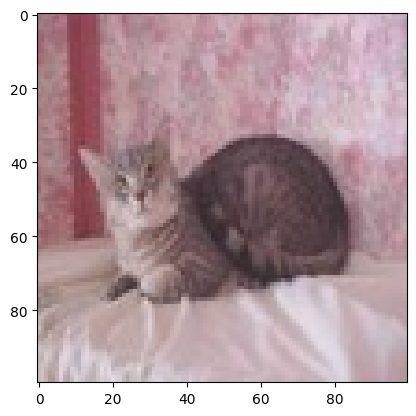

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
our model says it is a: cat


In [38]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred= model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if (y_pred== 0):
    pred = 'dog'
else:
    pred = 'cat'
print("our model says it is a:", pred)

In [12]:
model.save('model.h5')
print('Saved model to model.h5')

Saved model to model.h5
